Лучшее решение (x1, x2): [5.01172871 5.99158485]
Значение функции в лучшем решении: 0.000621065045774581


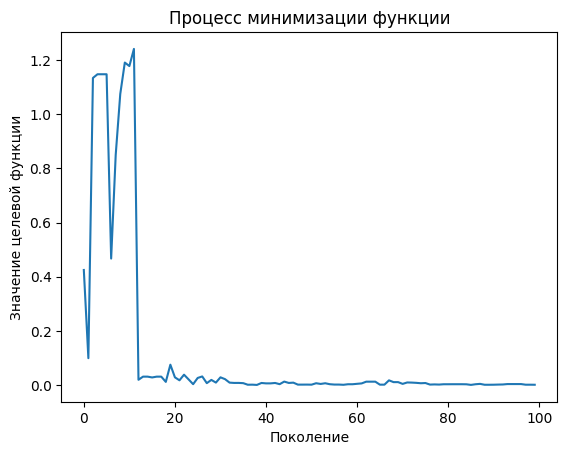

In [2]:
#  опирался на этот гайд https://proproprogs.ru/ga/ga-osnovnye-etapy-raboty-geneticheskogo-algoritma

import numpy as np
import random
from itertools import product

# Функция для минимизации
def fitness_function(x):
    x1, x2 = x
    return 4 * (x1 - 5) ** 2 + (x2 - 6) ** 2

# Генерация начальной популяции
def generate_initial_population(pop_size, bounds):
    return [np.random.uniform(bounds[0], bounds[1], len(bounds)) for _ in range(pop_size)]

# Инверсия веса для выбора родителей
def weight_inversion(population):
    fitness_values = [fitness_function(ind) for ind in population]
    max_fitness = max(fitness_values)
    weights = [max_fitness - f + 1 for f in fitness_values]  # Инвертируем веса
    return weights

# Отбор родителей (Weighted Selection с инверсией веса)
def select_parents(population):
    weights = weight_inversion(population)
    parents = random.choices(population, weights=weights, k=2)  # Выбираем двух родителей
    return parents[0], parents[1]

# Кроссовер
def crossover(parent1, parent2, crossover_rate=0.7):
    if random.random() < crossover_rate:
        alpha = random.random()
        return alpha * parent1 + (1 - alpha) * parent2
    else:
        return parent1.copy()

# Мутация
def mutate(individual, mutation_rate=0.1, bounds=(-10, 10)):
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual[i] += np.random.normal(0, 1)
            individual[i] = np.clip(individual[i], bounds[0], bounds[1])
    return individual

# Генетический алгоритм
def genetic_algorithm(pop_size, bounds, generations, crossover_rate, mutation_rate):
    population = generate_initial_population(pop_size, bounds)
    history = []  # для записи истории

    for generation in range(generations):
        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = select_parents(population)
            child1 = crossover(parent1, parent2, crossover_rate)
            child2 = crossover(parent2, parent1, crossover_rate)
            new_population.append(mutate(child1, mutation_rate, bounds))
            new_population.append(mutate(child2, mutation_rate, bounds))

        population = new_population
        best_individual = min(population, key=fitness_function)
        history.append((generation, fitness_function(best_individual)))

    best_individual = min(population, key=fitness_function)
    return best_individual, fitness_function(best_individual), history

# Перебор гиперпараметров
def hyperparameter_tuning():
    population_sizes = [20, 50]
    crossover_rates = [0.6, 0.7, 0.8]
    mutation_rates = [0.1, 0.2]
    best_solution_overall = None
    best_fitness_overall = float('inf')
    best_history_overall = []

    for pop_size, cr, mr in product(population_sizes, crossover_rates, mutation_rates):
        best_solution, best_fitness, history = genetic_algorithm(
            pop_size, bounds, generations=100, crossover_rate=cr, mutation_rate=mr
        )

        if best_fitness < best_fitness_overall:
            best_fitness_overall = best_fitness
            best_solution_overall = best_solution
            best_history_overall = history

    return best_solution_overall, best_fitness_overall, best_history_overall

# Параметры алгоритма
bounds = [-10, 10]

# Выполняем подбор гиперпараметров
best_solution, best_fitness, history = hyperparameter_tuning()

print("Лучшее решение (x1, x2):", best_solution)
print("Значение функции в лучшем решении:", best_fitness)

# График значений функции на каждой итерации
import matplotlib.pyplot as plt

generations, fitness_values = zip(*history)
plt.plot(generations, fitness_values)
plt.xlabel("Поколение")
plt.ylabel("Значение целевой функции")
plt.title("Процесс минимизации функции")
plt.show()
